# CM1


## Iris data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
# load iris dataset
df = pd.read_csv('iris_dataset_missing.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor


In [3]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width          species
0        5.045070     2.508203      3.018024     1.164924  Iris-versicolor
1        6.325517     2.115481      4.542052     1.413651  Iris-versicolor
2        5.257497     3.814303      1.470660     0.395348      Iris-setosa
3        6.675168     3.201700      5.785461     2.362764   Iris-virginica
4        5.595237     2.678166      4.077750     1.369266  Iris-versicolor
..            ...          ...           ...          ...              ...
100      4.874848     3.217348      1.592887     0.123588      Iris-setosa
101      5.564197     2.771731      3.483588     1.074754  Iris-versicolor
102      5.548047     4.249211      1.453466     0.214527      Iris-setosa
103      5.510482     2.652867      4.276817     1.298032  Iris-versicolor
104      4.538713     3.056142      1.545136     0.241424      Iris-setosa

[105 rows x 5 columns]>

### Detecting missing values in each columns & data cleaning

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     4
petal_length    8
petal_width     0
species         0
dtype: int64

In [5]:
df.shape[0] - df.dropna().shape[0]

12

### Filling missing values and justificaiton
<p>There are 12 rows of data contains missing value. Because the missing data is less than 15% of the total data count and it's continuous data. Therefore, it is safe to impute missing values using mean.</p>

In [6]:
df['sepal_width'].fillna((df['sepal_width'].mean()), inplace=True)
df['petal_length'].fillna((df['petal_length'].mean()), inplace=True)

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Z-score Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
df_z = df.copy()
std_scaler = StandardScaler()
df_z.iloc[:,[0,1,2,3]] = std_scaler.fit_transform(df_z.iloc[:,[0,1,2,3]])

### Min-Max Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler
df_minmax= df.copy()
minmax_scaler = MinMaxScaler()
df_minmax.iloc[:,[0,1,2,3]] = minmax_scaler.fit_transform(df_minmax.iloc[:,[0,1,2,3]])

### Compare data normailzation by ploting 

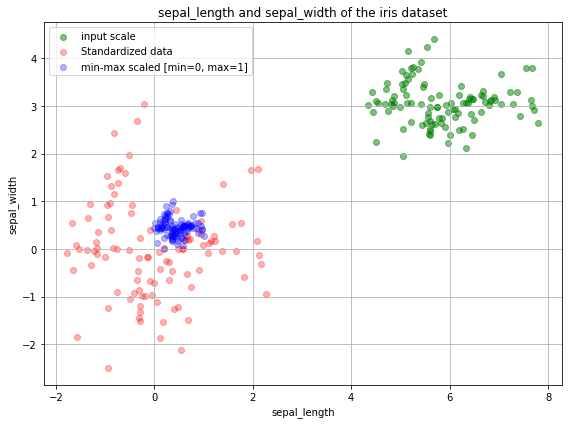

In [10]:
# matplotlib 
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['sepal_length'], df['sepal_width'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_z['sepal_length'], df_z['sepal_width'], color='red',
            label='Standardized data', alpha=0.3)

    plt.scatter(df_minmax['sepal_length'], df_minmax['sepal_width'],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('sepal_length and sepal_width of the iris dataset')
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

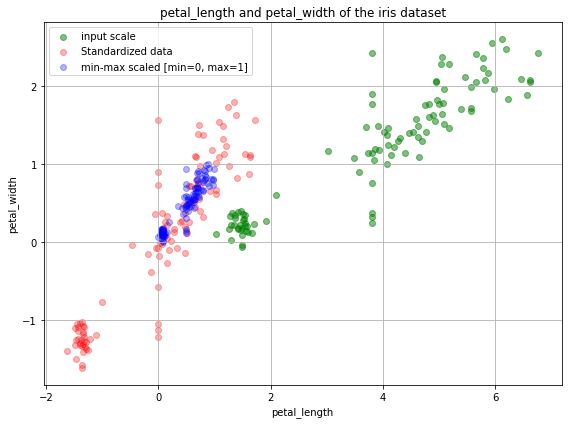

In [11]:
# matplotlib 
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['petal_length'], df['petal_width'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_z['petal_length'], df_z['petal_width'], color='red',
            label='Standardized data', alpha=0.3)

    plt.scatter(df_minmax['petal_length'], df_minmax['petal_width'],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('petal_length and petal_width of the iris dataset')
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

## Heart disease data

In [12]:
df_heart = pd.read_csv('heart_disease_missing.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0


### Detecting missing values in each columns & data cleaning

In [13]:
df_heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     7
chol        10
fbs          0
restecg      5
thalach      4
exang        0
oldpeak     12
slope        2
ca           0
thal         1
target       0
dtype: int64

### Dropping observations with missing categorial data
2  categorial data (restecg, slope) conatin missing values.  Because this data set is relatively large, it's safe to ignore these observations with missing values.

In [14]:
df_heart = df_heart.dropna(subset=['restecg', 'slope'])

In [15]:
df_heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     7
chol        10
fbs          0
restecg      0
thalach      4
exang        0
oldpeak     12
slope        0
ca           0
thal         1
target       0
dtype: int64

### Filling observations with missing numerical data

Now there are 5 numeric data contain missing values. Because its less than 15% of the total observation, it is safe to impute missing values using mean.

In [16]:
df_heart['chol'].fillna((df_heart['chol'].mean()), inplace=True)


In [17]:
df_heart['trestbps'].fillna((df_heart['trestbps'].mean()), inplace=True)


In [18]:
df_heart['thalach'].fillna((df_heart['thalach'].mean()), inplace=True)


In [19]:
df_heart['oldpeak'].fillna((df_heart['oldpeak'].mean()), inplace=True)


In [20]:
df_heart['thal'].fillna((df_heart['thal'].mean()), inplace=True)


In [21]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Min-Max Normalization
Converting numerical features into  standard ranges of values. Here I chose to normalize 'age', 'trestbps', 'chol', 'thalach','oldpeak', 'thal'

In [22]:
df_heart_minmax = df_heart.copy()
minmax_scaler = MinMaxScaler()
df_heart_minmax.iloc[:,[0,3,4,7,9,10,12]] = minmax_scaler.fit_transform(df_heart_minmax.iloc[:,[0,3,4,7,9,10,12]])
df_heart_minmax.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.979167,0,2,0.470641,0.252879,0,2.0,0.244681,0,0.230717,0.5,0,0.544604,1
1,0.291667,0,0,0.388835,0.765412,1,0.0,0.420115,1,0.518970,0.5,0,0.919222,0
2,0.375000,1,2,0.142289,0.415661,0,1.0,0.562440,0,0.024112,1.0,0,0.480494,0
3,0.458333,1,2,0.061073,0.422802,0,1.0,0.482156,1,0.216548,0.5,0,0.513354,1
4,0.583333,1,0,0.164763,0.743703,0,1.0,0.482595,1,0.514481,0.5,1,0.815637,0


### Zscore Normalization

In [23]:
df_heart_z = df_heart.copy()
std_scaler = StandardScaler()
df_heart_z.iloc[:,[0,3,4,7,9,10,12]]= std_scaler.fit_transform(df_heart_z.iloc[:,[0,3,4,7,9,10,12]])
df_heart_z.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2.385826,0,2,0.457921,-1.049309,0,2.0,-1.556586,0,0.139210,-0.657656,0,-0.285910,1
1,-1.238722,0,0,0.007041,2.115676,1,0.0,-0.625361,1,1.650279,-0.657656,0,1.225207,0
2,-0.799383,1,2,-1.351818,-0.044101,0,1.0,0.130116,0,-0.943851,0.947338,0,-0.544517,0
3,-0.360044,1,2,-1.799443,0.000000,0,1.0,-0.296041,1,0.064934,-0.657656,0,-0.411967,1
4,0.298965,1,0,-1.227948,1.981615,0,1.0,-0.293709,1,1.626747,-0.657656,1,0.807371,0


## Normalization Observation 

<p>Without normalization, data shows different scales and ranges. After using Min_max normalization, all features will have the same scale(between 0 and 1). From the iris data plot, min_max scale may cause data clustering therefore it may not handle outliers well. On the other hand z_score normalization resonably scales data to same scale with certain dispersion.</p> <p>Additionaly, data normalization does not change to the shapes of pairplots from <strong> [CM2] <strong>. </p>

# CM2

## Iris data

### Pair plot using raw data

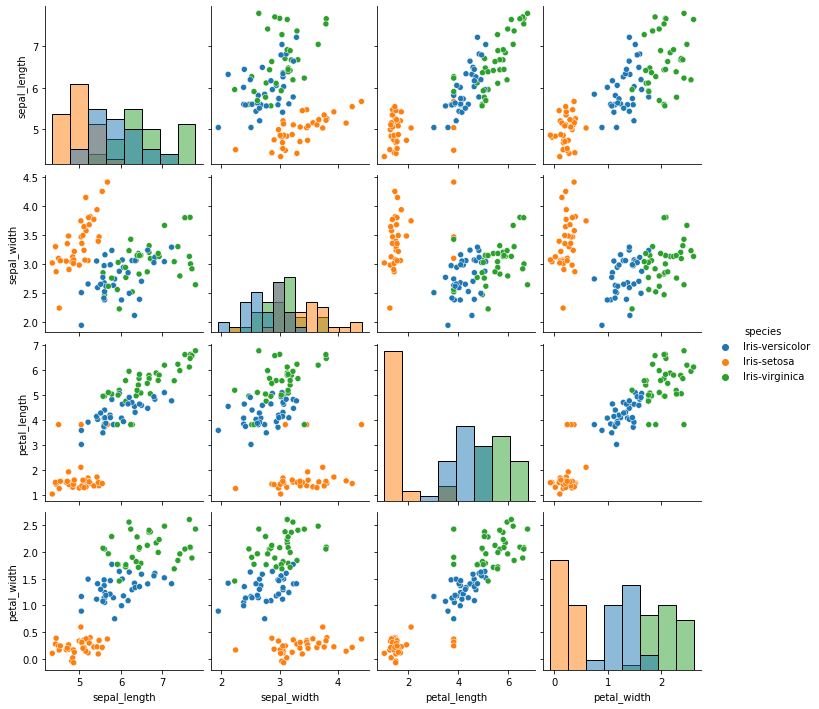

In [24]:
g=sns.pairplot(df, hue='species',diag_kind='hist')

### Pair plot using min-max normalized data

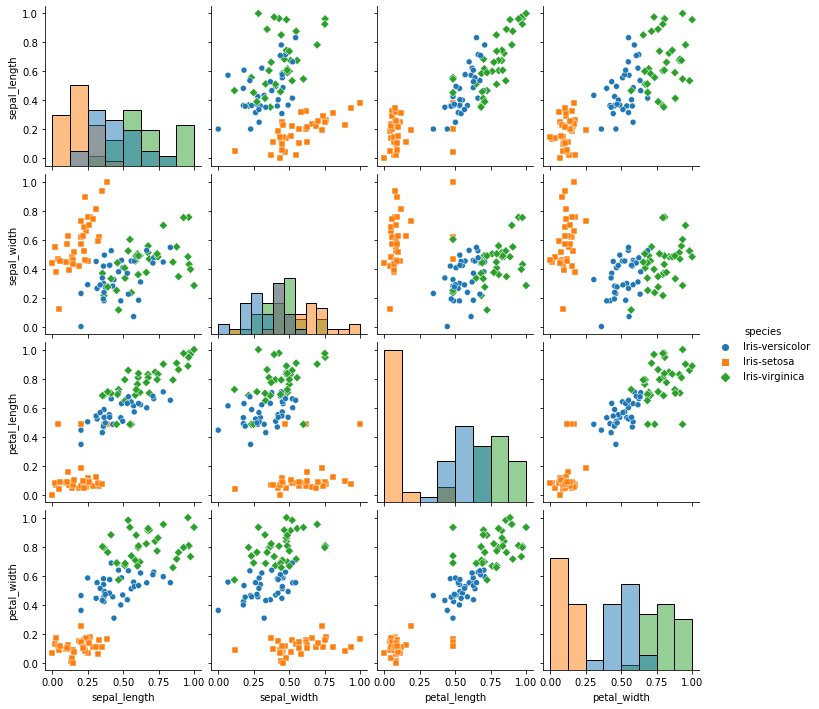

In [25]:
g=sns.pairplot(df_minmax, hue='species',diag_kind='hist',markers=['o','s','D'])

### Pair plot using z-score normalized data

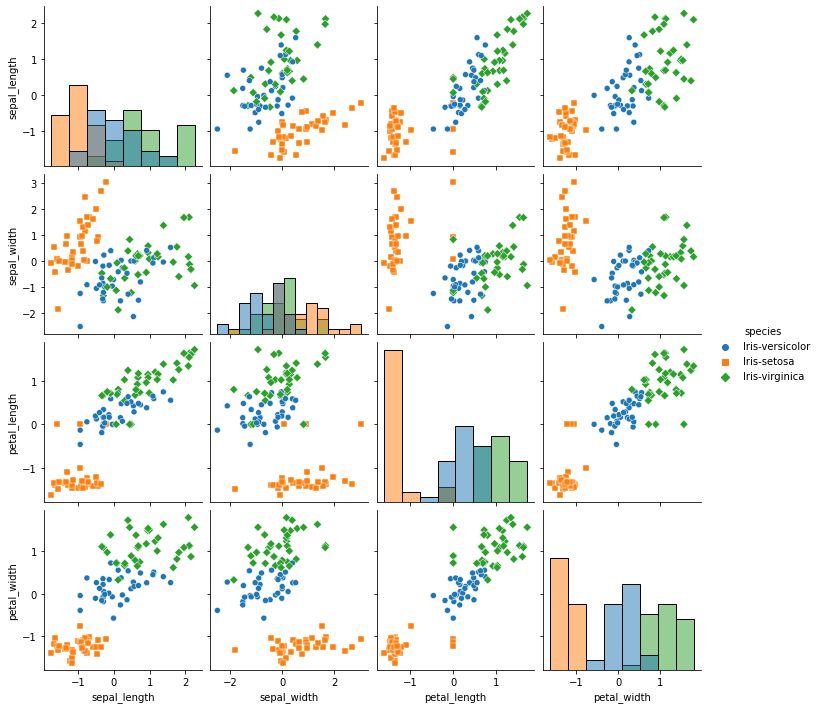

In [26]:
g=sns.pairplot(df_z, hue='species',diag_kind='hist',markers=['o','s','D'])

## Heart disease data

### Feature selection using pearson correlation
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when selecting features generally drop out features that are highly correllated(r>0.9)  (https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf 
)

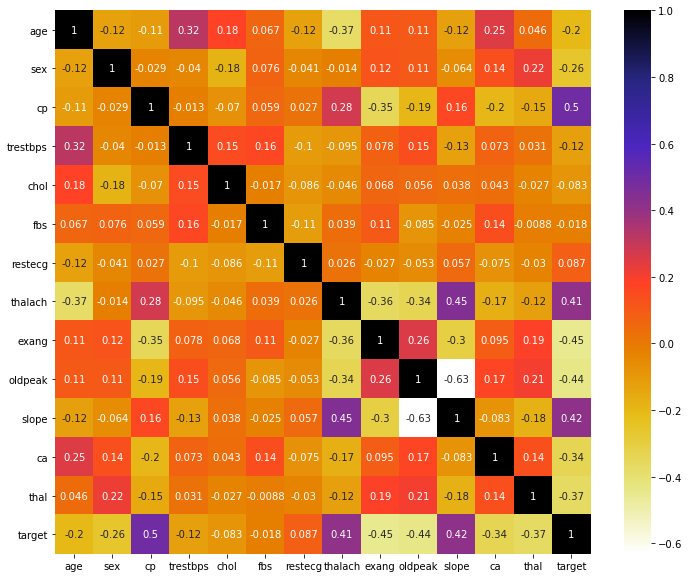

In [27]:
plt.figure(figsize=(12,10))
cor = df_heart.corr()
sns.heatmap(cor,annot =True,cmap=plt.cm.CMRmap_r)
plt.show()

From the correlation heatmap above, cp, exang, oldpeak, slope are low to moderately corellated with target. These features are selected for the subsequent pair plots

### Pair plot using raw data

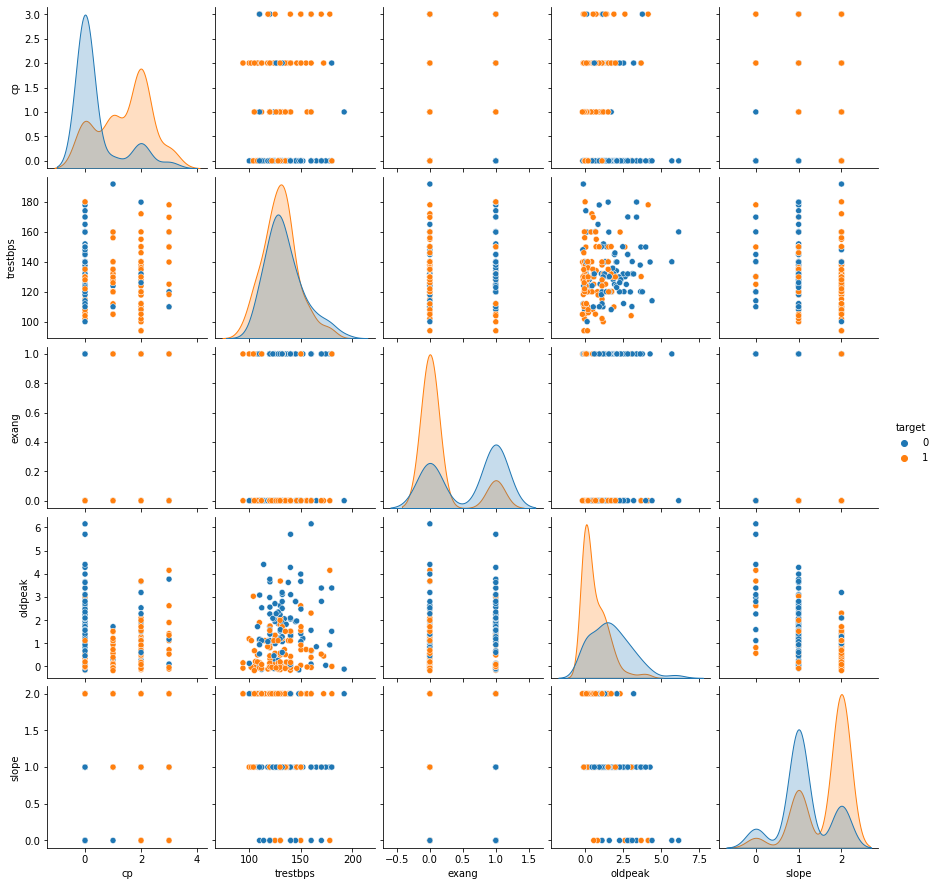

In [28]:
g=sns.pairplot(df_heart,
            x_vars=['cp','trestbps', 'exang', 'oldpeak', 'slope'],
            y_vars=['cp','trestbps', 'exang', 'oldpeak', 'slope'],
            hue='target')

### Pair plot using z-score normalized data

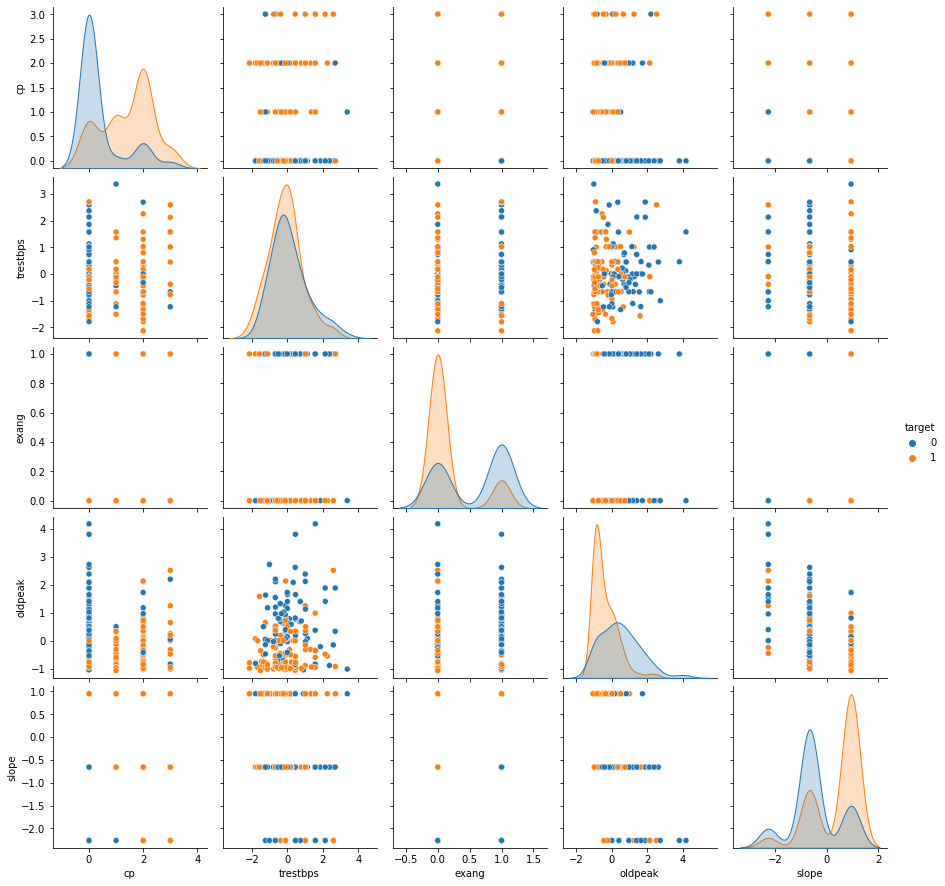

In [29]:
g=sns.pairplot(df_heart_z,
            x_vars=['cp','trestbps', 'exang', 'oldpeak', 'slope'],
            y_vars=['cp','trestbps', 'exang', 'oldpeak', 'slope'],
            hue='target')

### Interesting pattern:
From oldpeak vs slope plot, when oldpeak<1 and slope =2, it is highly likely that a person has heart disease. Similarly, from oldpeak vs exang plot, when oldpeak<2 and exang =0, it is highly likely that a person has heart disease.

# CM3

## Iris data

### Finding correlation r

In [30]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.031567,0.863919,0.809915
sepal_width,-0.031567,1.000000,-0.261689,-0.264253
petal_length,0.863919,-0.261689,1.000000,0.921109
petal_width,0.809915,-0.264253,0.921109,1.000000


In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor


<p> From the seaborn plot above and correlation table, it is clear that petal_length and sepal_length , petal_width and sepal_length , petal_length and petal_width are strongly correlated (r>0.7). Other feature pairs are not or very weakly correlated (r<0.3). </p>

### Calculate mean, variance, skew and kurtosis

In [32]:
variance= df.var()
print('Variance is:')


Variance is:


In [33]:
mean =df.mean()
print('Mean is: ')
mean

Mean is: 


sepal_length    5.858909
sepal_width     3.059083
petal_length    3.812370
petal_width     1.199708
dtype: float64

In [34]:
skewness = df.skew()
print('Skewness is: ')
skewness

Skewness is: 


sepal_length    0.401506
sepal_width     0.374702
petal_length   -0.265784
petal_width    -0.074751
dtype: float64

In [35]:
kurt=df.kurt()
print('Kurtosis is: ')
kurt

Kurtosis is: 


sepal_length   -0.544820
sepal_width     0.649582
petal_length   -1.248929
petal_width    -1.315451
dtype: float64

## Heart disease data

### Finding correlation r

In [36]:
X_heart = df_heart.iloc[:,:-1]
corr = X_heart.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.121640,-0.105484,0.321295,0.178171,0.067323,-0.124356,-0.373056,0.111096,0.107075,-0.116396,0.254231,0.045731
sex,-0.121640,1.000000,-0.029044,-0.040403,-0.182837,0.075620,-0.041339,-0.014367,0.120806,0.107534,-0.063791,0.136520,0.220499
cp,-0.105484,-0.029044,1.000000,-0.013346,-0.070381,0.059283,0.027341,0.279063,-0.349594,-0.191927,0.159047,-0.195126,-0.151406
trestbps,0.321295,-0.040403,-0.013346,1.000000,0.146390,0.159801,-0.103036,-0.095156,0.077855,0.145820,-0.125637,0.072994,0.030510
chol,0.178171,-0.182837,-0.070381,0.146390,1.000000,-0.017194,-0.086286,-0.046239,0.067787,0.056301,0.037975,0.043442,-0.027123
fbs,0.067323,0.075620,0.059283,0.159801,-0.017194,1.000000,-0.111974,0.038803,0.106280,-0.084674,-0.024620,0.143594,-0.008814
restecg,-0.124356,-0.041339,0.027341,-0.103036,-0.086286,-0.111974,1.000000,0.025666,-0.026598,-0.053367,0.056843,-0.075225,-0.029632
thalach,-0.373056,-0.014367,0.279063,-0.095156,-0.046239,0.038803,0.025666,1.000000,-0.362560,-0.335492,0.450019,-0.169422,-0.118952
exang,0.111096,0.120806,-0.349594,0.077855,0.067787,0.106280,-0.026598,-0.362560,1.000000,0.257770,-0.303466,0.094792,0.186162
oldpeak,0.107075,0.107534,-0.191927,0.145820,0.056301,-0.084674,-0.053367,-0.335492,0.257770,1.000000,-0.630979,0.169856,0.206974


### Calculate mean, variance, skew and kurtosis

In [37]:
mean =X_heart.mean()
print('Mean is: ')
mean

Mean is: 


age          54.278049
sex           0.687805
cp            0.956098
trestbps    131.954314
chol        244.828532
fbs           0.131707
restecg       0.560976
thalach     149.413011
exang         0.351220
oldpeak       1.116630
slope         1.409756
ca            0.726829
thal          2.347355
dtype: float64

In [38]:
variance= X_heart.var()
print('Variance is:')
variance

Variance is:


age           83.299761
sex            0.215782
cp             1.042181
trestbps     318.198831
chol        2078.568287
fbs            0.114921
restecg        0.286705
thalach      464.358876
exang          0.228981
oldpeak        1.466882
slope          0.390100
ca             1.091679
thal           0.361363
dtype: float64

In [39]:
skewness = X_heart.skew()
print('Skewness is: ')
skewness

Skewness is: 


age        -0.109845
sex        -0.816558
cp          0.451408
trestbps    0.702034
chol        0.321524
fbs         2.194224
restecg     0.141222
thalach    -0.379306
exang       0.627963
oldpeak     1.260606
slope      -0.567446
ca          1.400444
thal       -0.269684
dtype: float64

In [40]:
kurt=X_heart.kurt()
print('Kurtosis is: ')
kurt

Kurtosis is: 


age        -0.517089
sex        -1.346465
cp         -1.261793
trestbps    0.702289
chol        0.408508
fbs         2.842256
restecg    -1.175361
thalach    -0.170362
exang      -1.621580
oldpeak     1.695990
slope      -0.595482
ca          1.063175
thal       -0.607360
dtype: float64

# CM4 KNN

## Iris data

In [41]:
y=df_z.iloc[:,-1]
X=df_z.iloc[:,:-1]
# split into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state =98)

# Training and Predicting using default parameter
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

### Accuracy

In [42]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,y_predict)
acc

0.9523809523809523

<strong>Iris</strong>: With the default parameters, accuracy obtained is 0.952

## Heart disease data

In [43]:
y_h=df_heart_z.iloc[:,-1]
X_h=df_heart_z.iloc[:,:-1]
# split into training and test set
from sklearn.model_selection import train_test_split
xh_train,xh_test,yh_train,yh_test = train_test_split(X_h,y_h,test_size =0.2, random_state =98)

# Training and Predicting using default parameter
from sklearn.neighbors import KNeighborsClassifier
knn_h=KNeighborsClassifier()
knn_h.fit(xh_train,yh_train)
yh_predict = knn_h.predict(xh_test)

### Accuracy

In [44]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(yh_test,yh_predict)
acc

0.8780487804878049

<strong>Heart disease</strong>: With the default parameters, accuracy obtained is 0.878

# CM5 KNN Tuning

## Iris data 
### Tuning K using train-validate-test

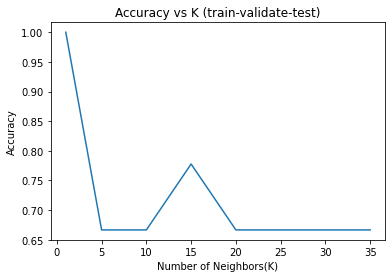

[1.0, 0.6666666666666666, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


In [45]:
# x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state =98)
# further split training set into train and validation set
x_train2, x_cv, y_train2, y_cv = train_test_split(x_train,y_train,test_size = 0.1,random_state=98)

k_vals= [1, 5, 10, 15, 20, 25, 30, 35]
accuracy_list=[]

for i in k_vals:
    knnmodel=KNeighborsClassifier(n_neighbors=i,).fit(x_train2,y_train2)
    y_predict = knnmodel.predict(x_cv)
    accuracy_list.append(accuracy_score(y_cv,y_predict))
    
# plot accuracy vs k
plt.plot(k_vals,accuracy_list)
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K (train-validate-test)')
plt.show()
print(accuracy_list)

### Tuning K using 5-fold cross validation method

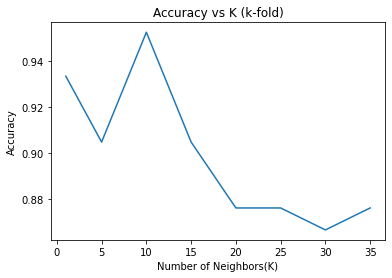

In [46]:
k_vals= [1, 5, 10, 15, 20, 25, 30, 35]
accuracy_list=[]
variance=[]

for i in k_vals:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
    accuracy_list.append(scores.mean())
    variance.append(np.var(scores))
    
# plot Accuracy vs K 5-fold
plt.plot(k_vals,accuracy_list)
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K (k-fold)')
plt.show()


The mean accuracies for k-fold cross validations are:

In [47]:
print(accuracy_list)

[0.9333333333333332, 0.9047619047619048, 0.9523809523809523, 0.9047619047619049, 0.8761904761904761, 0.8761904761904761, 0.8666666666666666, 0.8761904761904761]


With variances of:

In [48]:
print(variance)

[0.0005442176870748286, 0.0018140589569160994, 0.0009070294784580497, 0.004535147392290249, 0.0023582766439909286, 0.0023582766439909286, 0.0030839002267573678, 0.0050793650793650785]


<p>The <strong>best k </strong> in terms of classification accuracy is 10 with a corresponding accuracy of 0.9524</p>
<p></p>


## Heart disease data
### Tuning K using train-validate-test

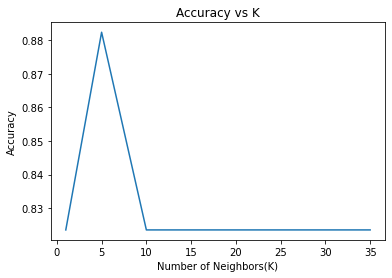

[0.8235294117647058, 0.8823529411764706, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]


In [49]:
# further split training set into train and validation set
xh_train2, xh_cv, yh_train2, yh_cv = train_test_split(xh_train,yh_train,test_size = 0.1,train_size =0.9,random_state=98)

k_vals=[1, 5, 10, 15, 20, 25, 30, 35]
accuracy_list2=[]

for i in k_vals:
    knnmodel=KNeighborsClassifier(n_neighbors=i).fit(xh_train2,yh_train2)
    yh_predict = knnmodel.predict(xh_cv)
    a_score = accuracy_score(yh_cv,yh_predict)
    accuracy_list2.append(a_score)

#  Accuracy vs K 
plt.plot(k_vals,accuracy_list2)
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()

print(accuracy_list2)
   

From the above plot, <strong> k=5 gives the highest accuracy of 0.8824 </strong>.

### Q:Do you find any advantage to one form of validation over the other?
<p>The <strong>cross-validation method</strong> has the ability to train on multiple train-test splits, therefore the it gives a better insight of the model performance on the entire data. The <strong>train-validate-test</strong> method however only train on one train-test splits and therefore the accuarcy is highly dependent on the <strong>random_state</strong> value.</p>
<p>On the other hand, because <strong>train-validate-test</strong> works like 1-fold cross validation, it's much quicker to compute  than <strong>cross-validation method</strong>  </p>

# CM6  accuracy, AUC, f-score of your best kNN classifier

## Iris data

In [50]:
# fit classifier with best k for iris data k =10
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

In [51]:
accuracy_score(y_test,y_predict)

0.9523809523809523

In [52]:
from sklearn.metrics import roc_auc_score, f1_score
f1_score(y_test,y_predict,average='macro')

0.9076923076923077

In [53]:
# for multiple class classifier, need to encode the lebal and calculate predict proba before calculate AUC 

le =  preprocessing.LabelEncoder()
le.fit(y_train)
y_predict_enc = le.transform(y_predict)
y_test_enc = le.transform(y_test)
y_pred_proba =knn.predict_proba(x_test)

In [54]:
roc_auc_score(y_test_enc,y_pred_proba,multi_class='ovr')

0.9950617283950617

<p> For <strong>iris data set</strong> with <strong> k=10 </strong>, the accuracy score, f-score and AUC are 0.9524, 0.9076, 0.0.9950 respectively </p>

## Heart disease data

In [55]:
# xh_train,xh_test,yh_train,yh_test = train_test_split(X_h,y_h,test_size =0.2, random_state =98)

knn2=KNeighborsClassifier(n_neighbors=5)
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)

In [56]:
accuracy_score(yh_test,yh_predict)

0.8780487804878049

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
f1_score(yh_test,yh_predict)

0.9019607843137256

In [58]:
roc_auc_score(yh_test,yh_predict)

0.8902116402116402

For <strong> heart disease data set</strong> with <strong>k=5</strong>, the accuracy score, f-score and AUC are 0.8780,0.9020,0.8902 respectively

### Q: What was the effect of changing k? Was the accuracy always affected the same way with an increase of k? Why do you think this happened?

<p> <strong> For iris data</strong>, the accuracy fluctuates when k is small, when k = 10, the accuracy reaches its maximum.  After accuracy reaches its local maximum, the accuracy starts to decrease with increasing k values, with smaller fluctuations. </p>

<p><strong> For heart disease data </strong>, increasing k in the begining shows positive effect on accuracy. After reaching maximum, accuracy decreases with increaing k. When k>10 the accuracy stays at a constant value.<p>

<p> This trend might happen because for low values of K, result can be subbject to the effects of outliers and noise from data and the classifier's decisions will tend to be affected by local changes more easily. On the ohter hand, large k values generates less complex classifier which could over smoothing data features and therefore lows the accuracy </p>

source:https://stats.stackexchange.com/questions/429990/in-the-context-of-knn-why-small-k-generates-complex-models


# CM7 the improved model

## KNN with different weight and metric parameters
## Iris:

###  Distance weighted KNN with minkowski metric

In [59]:
# fit classifier with best k for iris data k =10
knn=KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict,average='macro')
print("Accuracy score: %s, f_score: %s " % (accuracy, f_score))

Accuracy score: 1.0, f_score: 1.0 


###  Distance weighted KNN  with  manhattan metric

In [60]:
knn=KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict,average='macro')
print("Accuracy score: %s, f_score: %s " % (accuracy, f_score))

Accuracy score: 0.9523809523809523, f_score: 0.9076923076923077 


###  Distance weighted KNN  with euclidean metric


In [61]:
knn=KNeighborsClassifier(n_neighbors=10, metric='euclidean', weights='distance')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict,average='macro')
print("Accuracy score: %s, f_score: %s " % (accuracy, f_score))

Accuracy score: 1.0, f_score: 1.0 


###  Uniform weighted KNN  with  minkowski metric (default parameter)

In [62]:
knn=KNeighborsClassifier(n_neighbors=10, metric='minkowski')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict,average='macro')
print("Accuracy score: %s, f_score: %s " % (accuracy, f_score))

Accuracy score: 0.9523809523809523, f_score: 0.9076923076923077 


###  Uniform weighted KNN  with  manhattan metric

In [63]:
knn=KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict,average='macro')
print("Accuracy score: %s, f_score: %s " % (accuracy, f_score))

Accuracy score: 0.9523809523809523, f_score: 0.9076923076923077 


###  Uniform weighted KNN  with  euclidean metric

In [64]:
knn=KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict,average='macro')
print("Accuracy score: %s, f_score: %s " % (accuracy, f_score))

Accuracy score: 0.9523809523809523, f_score: 0.9076923076923077 


<strong>Iris data: </strong>Change weights parameter to <strong> distance </strong> improves accu_score f_score to 1, 1 respectively. Changing metrics has no effect on classifer performance

## Heart disease:

###  Distance weighted KNN with minkowski metric

In [65]:
knn2=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)
accuracy=accuracy_score(yh_test,yh_predict)

f_score=f1_score(yh_test,yh_predict)
auc=roc_auc_score(yh_test,yh_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accuracy, f_score, auc))


Accuracy score: 0.8780487804878049, f_score: 0.9019607843137256 AUC: 0.8902116402116402


###  Distance weighted KNN  with  manhattan metric

In [66]:
knn2=KNeighborsClassifier(n_neighbors=5,weights='distance', metric='manhattan')
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)
accuracy=accuracy_score(yh_test,yh_predict)

f_score=f1_score(yh_test,yh_predict)
auc=roc_auc_score(yh_test,yh_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accuracy, f_score, auc))


Accuracy score: 0.9024390243902439, f_score: 0.923076923076923 AUC: 0.9087301587301587


###  Distance weighted KNN  with euclidean metric


In [67]:
knn2=KNeighborsClassifier(n_neighbors=5,weights='distance', metric='euclidean')
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)
accuracy=accuracy_score(yh_test,yh_predict)

f_score=f1_score(yh_test,yh_predict)
auc=roc_auc_score(yh_test,yh_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accuracy, f_score, auc))


Accuracy score: 0.8780487804878049, f_score: 0.9019607843137256 AUC: 0.8902116402116402


###  Uniform weighted KNN  with  minkowski metric (default parameter)

In [68]:
knn2=KNeighborsClassifier(n_neighbors=5,weights='uniform', metric='minkowski')
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)
accuracy=accuracy_score(yh_test,yh_predict)

f_score=f1_score(yh_test,yh_predict)
auc=roc_auc_score(yh_test,yh_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accuracy, f_score, auc))


Accuracy score: 0.8780487804878049, f_score: 0.9019607843137256 AUC: 0.8902116402116402


###  Uniform weighted KNN  with  manhattan metric

In [69]:
knn2=KNeighborsClassifier(n_neighbors=5,weights='uniform', metric='manhattan')
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)
accuracy=accuracy_score(yh_test,yh_predict)

f_score=f1_score(yh_test,yh_predict)
auc=roc_auc_score(yh_test,yh_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accuracy, f_score, auc))


Accuracy score: 0.9024390243902439, f_score: 0.923076923076923 AUC: 0.9087301587301587


###  Uniform weighted KNN  with  euclidean metric

In [70]:
knn2=KNeighborsClassifier(n_neighbors=5,weights='uniform', metric='euclidean')
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)
accuracy=accuracy_score(yh_test,yh_predict)

f_score=f1_score(yh_test,yh_predict)
auc=roc_auc_score(yh_test,yh_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accuracy, f_score, auc))


Accuracy score: 0.8780487804878049, f_score: 0.9019607843137256 AUC: 0.8902116402116402


<strong>Heart disease data: </strong>Changing metric parameter to <strong> manhattan </strong> improves accu_score f_score and auc score to 0.9024, 0.9230, 0.9087 respectively. Changing weights has no effect on classifer performance

## Other KNN Algorithms:
## Iris:

### KNN with ball_tree algorithm

In [71]:
knn=KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict,average='macro')
print("Accuracy score: %s, f_score: %s " % (accuracy, f_score))

Accuracy score: 0.9523809523809523, f_score: 0.9076923076923077 


### KNN with kd_tree algorithm

In [72]:
knn=KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict,average='macro')
print("Accuracy score: %s, f_score: %s " % (accuracy, f_score))

Accuracy score: 0.9523809523809523, f_score: 0.9076923076923077 


### KNN with brute algorithm

In [73]:
knn=KNeighborsClassifier(n_neighbors=10, algorithm='brute')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict,average='macro')
print("Accuracy score: %s, f_score: %s " % (accuracy, f_score))

Accuracy score: 0.9523809523809523, f_score: 0.9076923076923077 


## Heart Disease:

### KNN with ball_tree algorithm

In [74]:
knn2=KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)
accuracy=accuracy_score(yh_test,yh_predict)

f_score=f1_score(yh_test,yh_predict)
auc=roc_auc_score(yh_test,yh_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accuracy, f_score, auc))

Accuracy score: 0.8780487804878049, f_score: 0.9019607843137256 AUC: 0.8902116402116402


### KNN with kd_tree algorithm

In [75]:
knn2=KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree')
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)
accuracy=accuracy_score(yh_test,yh_predict)

f_score=f1_score(yh_test,yh_predict)
auc=roc_auc_score(yh_test,yh_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accuracy, f_score, auc))

Accuracy score: 0.8780487804878049, f_score: 0.9019607843137256 AUC: 0.8902116402116402


### KNN with brute algorithm

In [76]:
knn2=KNeighborsClassifier(n_neighbors=5,algorithm='brute')
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)
accuracy=accuracy_score(yh_test,yh_predict)

f_score=f1_score(yh_test,yh_predict)
auc=roc_auc_score(yh_test,yh_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accuracy, f_score, auc))

Accuracy score: 0.8780487804878049, f_score: 0.9019607843137256 AUC: 0.8902116402116402


### Q6: 

From the above calculations, different KNN algorithms have no effect on to the classifier performance. This is possible due to the limit from classifer. As stated from the online document of sklearn.neighbors.KNeighborsClassifier, "Note: fitting on sparse input will override the setting of this parameter, using brute force." Therefore with the given dataset, it's not possible evaluate the effects of different NN algorithms on to classifier performance.   <p> source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html </p>

## CM7 answer 

### iris

In [77]:
# fit classifier with best k for iris data k =10 and best weights is distance
knn=KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

In [78]:
accuracy_score(y_test,y_predict)

1.0

In [79]:
f1_score(y_test,y_predict,average='macro')

1.0

In [80]:
# for multiple class classifier, need to encode the lebal and calculate predict proba before calculate AUC 

le =  preprocessing.LabelEncoder()
le.fit(y_train)
y_predict_enc = le.transform(y_predict)
y_test_enc = le.transform(y_test)
y_pred_proba =knn.predict_proba(x_test)

In [81]:
roc_auc_score(y_test_enc,y_pred_proba,multi_class='ovr')

1.0

 <p> For <strong>iris data set</strong> with <strong> k=10, weights ='distance'</strong>, the accuracy score, f-score and AUC are 1,1,1 respectively </p>

### heart disease

In [82]:
# fit classifer with best parameters for heart disease dataset k = 5, metric='manhattan'
knn2=KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn2.fit(xh_train,yh_train)
yh_predict = knn2.predict(xh_test)
accuracy=accuracy_score(yh_test,yh_predict)

f_score=f1_score(yh_test,yh_predict)
auc=roc_auc_score(yh_test,yh_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accuracy, f_score, auc))


Accuracy score: 0.9024390243902439, f_score: 0.923076923076923 AUC: 0.9087301587301587


For <strong> heart disease data set</strong> with <strong>k=5, metric ='manhattan'</strong>, the accuracy score, f-score and AUC are 0.9024, 0.9230, 0.9087 respectively.